# What is a Clustering Algorithm?

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group are more 
similar to each other than to those in other group. 

It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including machine learning, pattern recognition, image analysis, information retrieval, bioinformatics, data compression, and computer graphics.

Clustering is one of the most frequently utilized forms of unsupervised learning.Rather than ‘making predictions’, we instead want to categorize data into buckets. (via: Wikipedia)

In [ ]:
For this tutorial, we will be exploring the K-means clustering algorithm:

# K-means algorithm

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as 
the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to 
large number of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of  samples  into  disjoint clusters , each described by the mean  of the samples in the 
cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from , although they 
live in the same space. The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum of 
squared criterion.(via: Wikipedia)

# Use Cases

In [ ]:
K-Means is widely used for many applications:

Image Segmentation
Clustering Gene Segementation Data
News Article Clustering
Clustering Languages
Species Clustering
Anomaly Detection

(via: PythonProgramming)

# K-means algorithm basic steps:

The first step chooses the initial centroids, with the most basic method being to choose  samples from the dataset X . 
After initialization, K-means consists of looping between the two other steps. The first step assigns each sample to its 
nearest centroid.

The second step creates new centroids by taking the mean value of all of the samples assigned to each previous centroid. 
The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this 
value is less than a threshold. In other words, it repeats until the centroids do not move significantly.

# Data setup

In [ ]:
The dataset we are gonna use has a sample data with 3000 entries and 3 clusters. So the value of K is already known, 3.

In [2]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
#read data from csv file
data = pd.read_csv('xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


# Algorithm run, Graph and Discussion

In [ ]:
Our algorithm works as follows, assuming we have inputs x_1, x_2, x_3, ..., x_n and value of K

Step 1 - Pick K random points as cluster centers called centroids.
Step 2 - Assign each x_i to nearest cluster by calculating its distance to each centroid.
Step 3 - Find new cluster center by taking the average of the assigned points.
Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change.

In [ ]:
data gotten from https://github.com/mubaris/friendly-fortnight

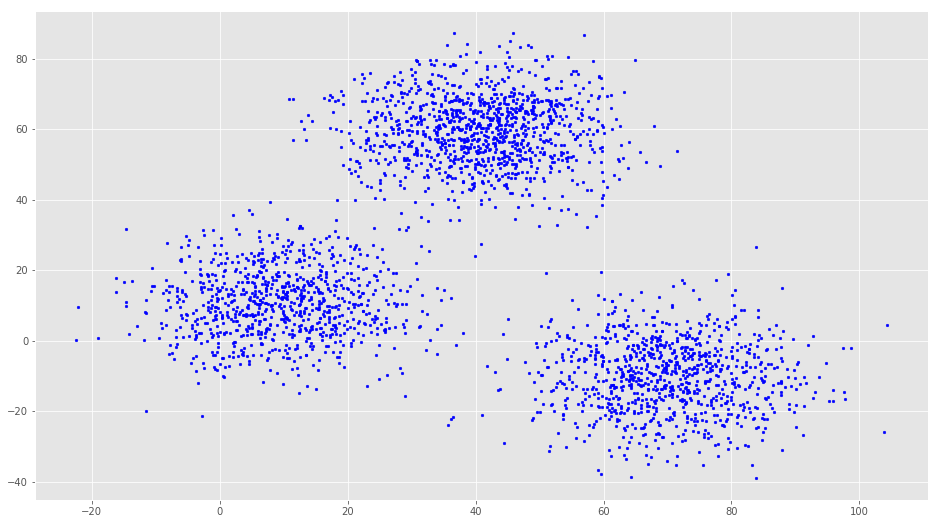

In [14]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='blue', s=7)

In [5]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [30]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[77. 35.]
 [73. 62.]
 [16. 64.]]


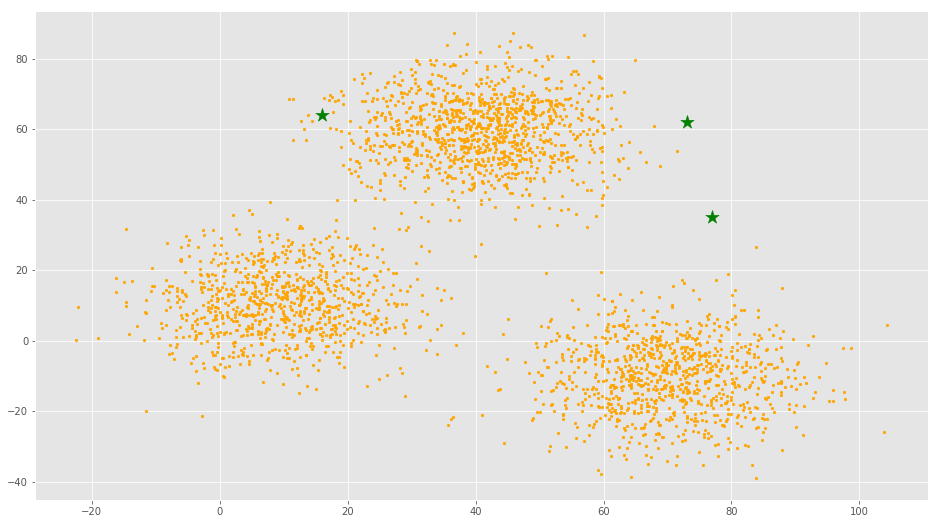

In [31]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='orange', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [8]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
(via:Mubaris, PythonProgramming)

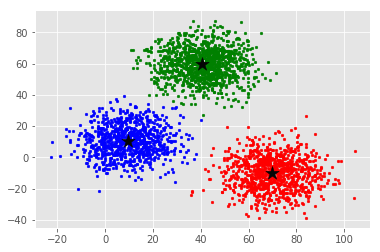

In [9]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [ ]:
From this visualization it is clear that there are 3 clusters with black stars as their centroid.

# Implement K-Means Clustering using scikit-learn

The scikit-learn approach using make_blob function which generates a new dataset. The scikit-learn approach using make_blob function which generates a new dataset. 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)

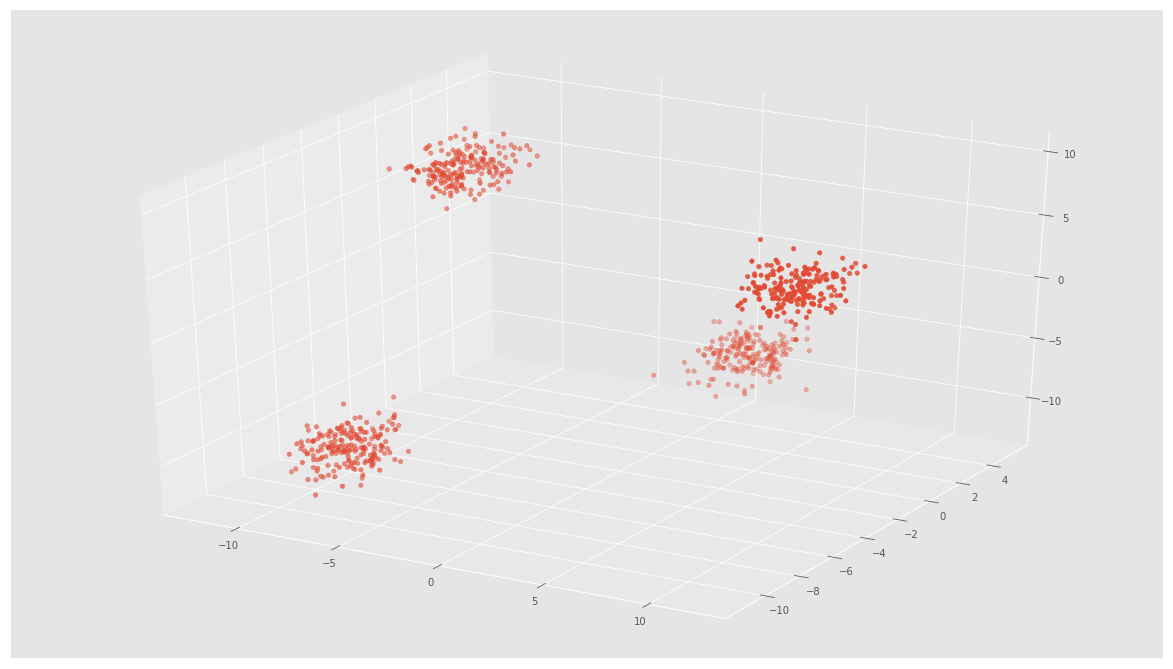

In [11]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [12]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

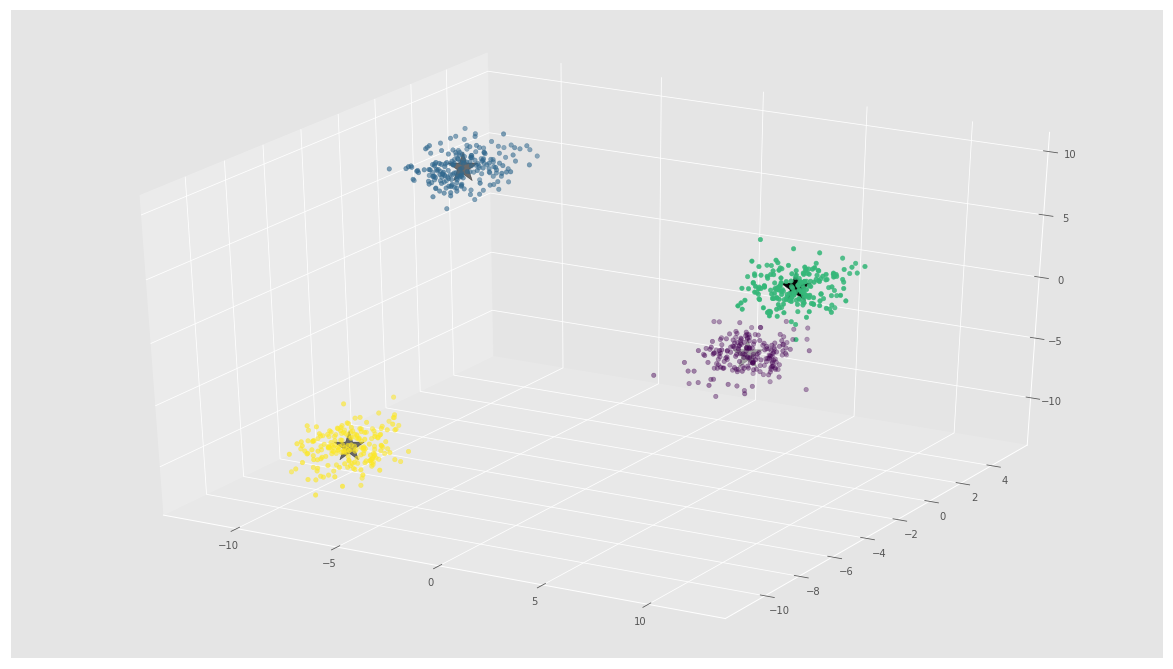

In [13]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

In [ ]:
In the above image, you can see 4 clusters and their centroids as stars.

# Bibliography

In [ ]:
“Cluster Analysis.” Wikipedia, Wikimedia Foundation, 11 Nov. 2018, en.wikipedia.org/wiki/Cluster_analysis.

In [ ]:
“2.3. Clustering.” 1.4. Support Vector Machines - Scikit-Learn 0.19.2 Documentation, scikit-learn.org/stable/modules/
clustering.html#overview-of-clustering-methods.

In [ ]:
Python Programming Tutorials, pythonprogramming.net/k-means-from-scratch-machine-learning-tutorial/.

In [ ]:
NK, Mubaris. “K-Means Clustering in Python.” Blog by ᴍᴜʙᴀʀɪꜱ ɴᴋ, 1 Oct. 2017, mubaris.com/posts/kmeans-clustering/.